In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

## Display all rows:

In [2]:
# To display all columns:
pd.pandas.set_option('display.max_columns', None)

## Loding Data:

In [3]:
# For colab:
# df1 = pd.read_csv('train_MICE_median_ind_QuantileTransformer.csv')
# df2 = pd.read_csv('train_MICE_med_ind_QT_dropOutlier.csv')

# For local
df1 = pd.read_csv('../data/interim/train_MICE_median_ind_QuantileTransformer.csv')
df2 = pd.read_csv('../data/interim/train_MICE_med_ind_QT_dropOutlier.csv')

In [4]:
#Dropping the last 5 columns as per feature selection:
drop_cols = ['PRI_jet_leading_phi',
 'PRI_jet_subleading_phi',
 'PRI_tau_phi',
 'PRI_met_phi',
 'PRI_lep_phi'] + ['Weight', 'Label']

X, y = df1.drop(columns=drop_cols), df1['Weight']
X2, y2 = df2.drop(columns=drop_cols), df2['Weight']

## Train-test split:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30000)     # about 12%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=30000)   # about 

## Metrics:

In [6]:
from sklearn.metrics import SCORERS, mean_squared_error

SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

## Adjusted R<sup>2</sup> & RMSE functions:

In [7]:
def adj_r2 (model, X, y):
    return 1 - (1 - model.score(X, y)) * ((len(y) - 1) / (len(y) - X.shape[1] - 1))

In [8]:
from sklearn.metrics import mean_squared_error

def rmse (model, X, y):
    return mean_squared_error(model.predict(X), y) ** (1/2)

# Training models:

We have seen earlier that GridSearchCv takes too much time. So we wont be using it.

## Decision Trees:

In [7]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(max_depth=12, min_samples_split=60, min_samples_leaf=30)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=30, min_samples_split=60)

In [13]:
model = dt

print("Train r2 = ",adj_r2(model, X_train, y_train))
print("Test r2 = ",adj_r2(model, X_test, y_test))

Train r2 =  0.6466007974667987
Test r2 =  0.5914733223492686


In [16]:
rmse(dt, X_test, y_test)

1.1933444445995331

In [22]:
rmse(dt, X_test2, y_test2)

1.126577614622787

In [17]:
# Using outlier removed dataset
dt1 = DecisionTreeRegressor(max_depth=12, min_samples_split=60, min_samples_leaf=30)
dt1.fit(X_train2, y_train2)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=30, min_samples_split=60)

In [18]:
model = dt1

print("Train r2 = ",adj_r2(model, X_train2, y_train2))
print("Test r2 = ",adj_r2(model, X_test2, y_test2))

Train r2 =  0.6429014676609575
Test r2 =  0.5873581116187929


In [20]:
rmse(dt1, X_test2, y_test2)

1.2175023411256547

### Vizatization using plot_tree:

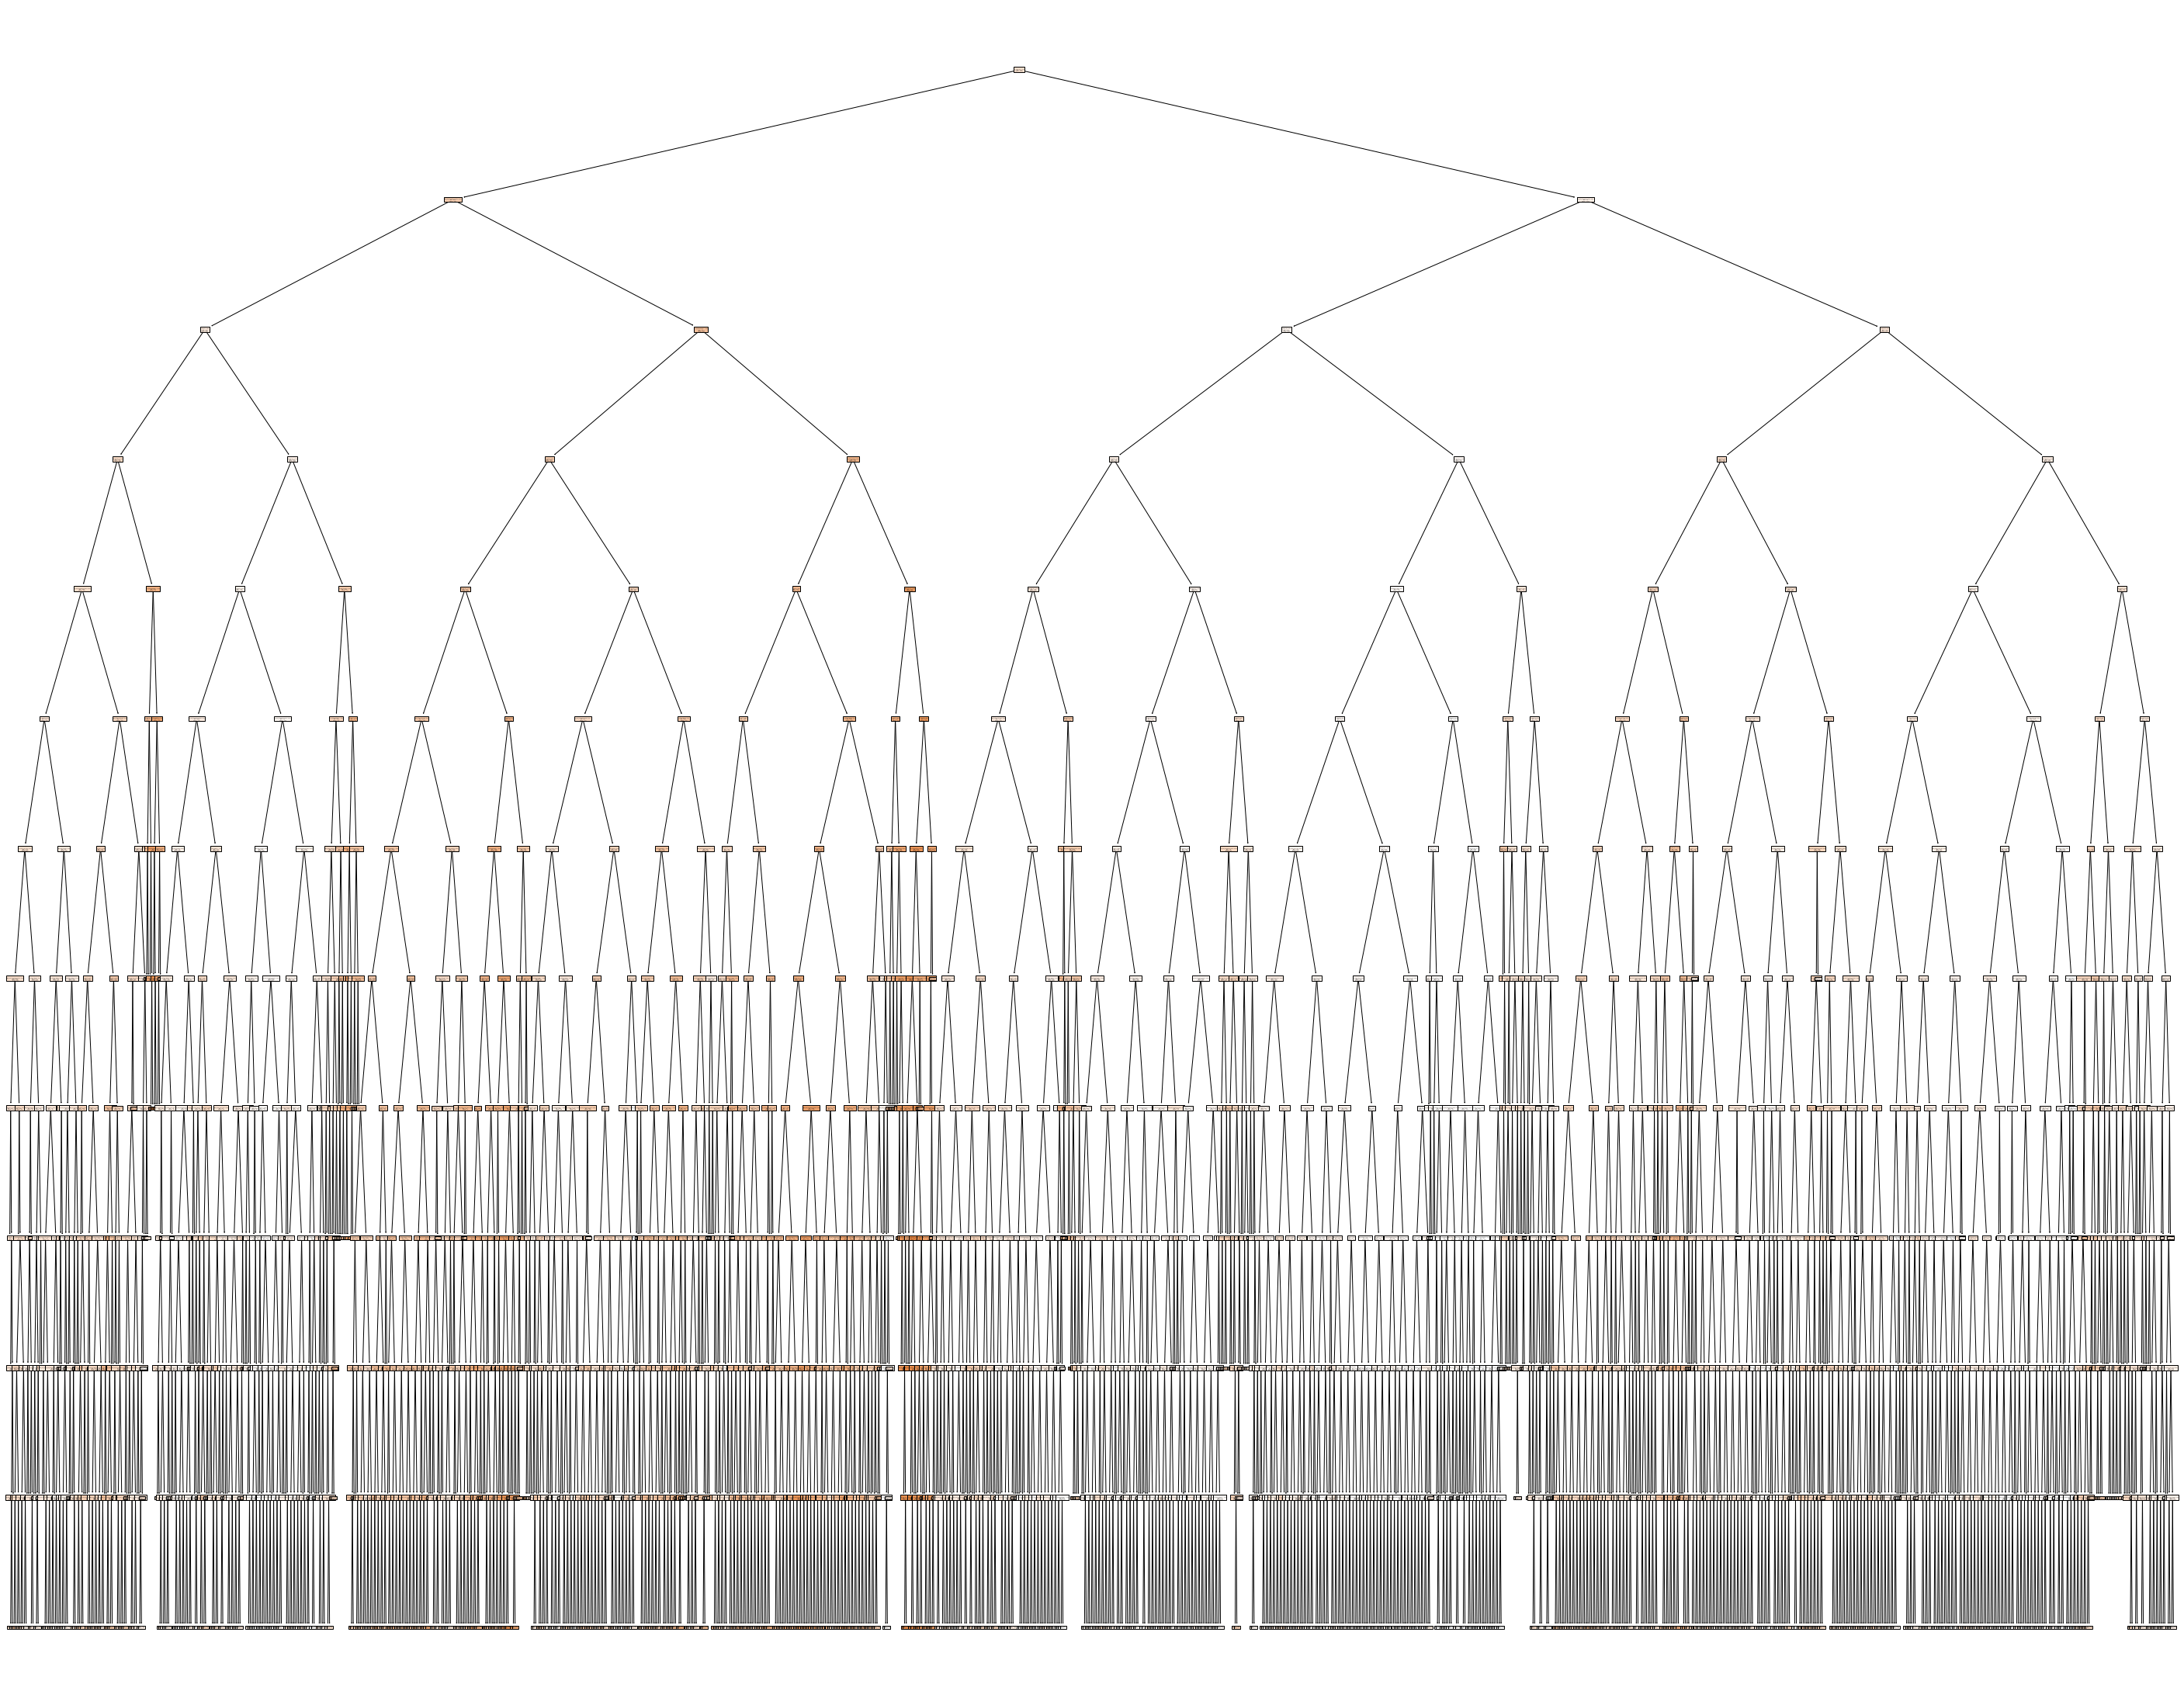

In [34]:
# Vizualization: https://mljar.com/blog/visualize-decision-tree/ 
    
fig = plt.figure(figsize=(100,80))
_ = plot_tree(dt, 
              feature_names=X_train.columns, 
              class_names= 'Weight', 
              filled=True)

plt.show()

In [40]:
fig.savefig("../reports/decistion_tree_regg_1.png", dpi=400, orientation='landscape')   # Nothing is visible

## Random Forest:

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=151, max_depth=11, max_features=21, 
                           max_samples=0.9, min_samples_split=60, min_samples_leaf=30)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features=21, max_samples=0.9,
                      min_samples_leaf=30, min_samples_split=60,
                      n_estimators=151)

In [23]:
model = rf

print("Train r2 = ",adj_r2(model, X_train, y_train))
print("Test r2 = ",adj_r2(model, X_test, y_test))

Train r2 =  0.6514146190200389
Test r2 =  0.6225265653067529


In [24]:
rmse(rf, X_test, y_test)

1.1470934529632808

In [25]:
rf2 = RandomForestRegressor(n_estimators=151, max_depth=11, max_features=21, 
                           max_samples=0.9, min_samples_split=60, min_samples_leaf=30)
rf2.fit(X_train2, y_train2)

RandomForestRegressor(max_depth=11, max_features=21, max_samples=0.9,
                      min_samples_leaf=30, min_samples_split=60,
                      n_estimators=151)

In [26]:
model = rf2

print("Train r2 = ",adj_r2(model, X_train2, y_train2))
print("Test r2 = ",adj_r2(model, X_test2, y_test2))

Train r2 =  0.6485527140133696
Test r2 =  0.624564072179057


In [27]:
rmse(rf2, X_test2, y_test2)

1.1613177504577612

## AdaBoost:

In [51]:
from sklearn.ensemble import AdaBoostRegressor

ab_est = DecisionTreeRegressor(max_depth=9, min_samples_split=60, min_samples_leaf=30)
ab = AdaBoostRegressor(ab_est, n_estimators=151, learning_rate=0.4)
ab.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=9,
                                                       min_samples_leaf=30,
                                                       min_samples_split=60),
                  learning_rate=0.4, n_estimators=151)

In [52]:
model = ab

print("Train r2 = ",adj_r2(model, X_train, y_train))
print("Test r2 = ",adj_r2(model, X_test, y_test))

Train r2 =  0.3599544525301198
Test r2 =  0.3353946716011722


In [53]:
'''Train r2 =  0.4897264827536898
Test r2 =  0.4642043085278712'''

'Train r2 =  0.4897264827536898\nTest r2 =  0.4642043085278712'

In [54]:
rmse(ab, X_test, y_test)

1.522080121378736

In [55]:
1.366643414942448

1.366643414942448

## XGBoost:

In [10]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [26]:
params = {
    'max_depth': [6,7,8] ,
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
}
x3 = xgb.XGBRegressor(n_estimators=150,  n_jobs=4, verbosity=1, subsample=0.85)

gscv = GridSearchCV(estimator=x3, param_grid=params, n_jobs=4, cv=5)

gscv.fit(X_train, y_train,
      verbose=True,
#       eval_metric='r_squared',
      early_stopping_rounds=15,       # Early stopping gives lower rmse value but r2 value is less  
      eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:2.05001
Will train until validation_0-rmse hasn't improved in 15 rounds.
[1]	validation_0-rmse:1.91790
[2]	validation_0-rmse:1.80283
[3]	validation_0-rmse:1.70375
[4]	validation_0-rmse:1.61855
[5]	validation_0-rmse:1.54546
[6]	validation_0-rmse:1.48296
[7]	validation_0-rmse:1.42982
[8]	validation_0-rmse:1.38518
[9]	validation_0-rmse:1.34765
[10]	validation_0-rmse:1.31578
[11]	validation_0-rmse:1.28902
[12]	validation_0-rmse:1.26660
[13]	validation_0-rmse:1.24818
[14]	validation_0-rmse:1.23265
[15]	validation_0-rmse:1.21957
[16]	validation_0-rmse:1.20836
[17]	validation_0-rmse:1.19915
[18]	validation_0-rmse:1.19161
[19]	validation_0-rmse:1.18514
[20]	validation_0-rmse:1.17944
[21]	validation_0-rmse:1.17508
[22]	validation_0-rmse:1.17131
[23]	validation_0-rmse:1.16797
[24]	validation_0-rmse:1.16556
[25]	validation_0-rmse:1.16345
[26]	validation_0-rmse:1.16144
[27]	validation_0-rmse:1.16001
[28]	validation_0-rmse:1.15848
[29]	validation_0-rmse:1.15703
[30]	validation

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=150, n_jobs=4,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=0.85,
                                    tree_method=None, validate_paramet

In [27]:
import pickle
with open('../models/regg/grid_search_xgb_with_outliers.pkl', 'wb') as fp:
    pickle.dump(gscv, fp)

In [28]:
gscv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.85,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [ ]:
params = {
    'max_depth': [6,7,8],
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
}
x4 = xgb.XGBRegressor(n_estimators=150,  n_jobs=4, verbosity=1, subsample=0.85)

gscv = GridSearchCV(estimator=x4, param_grid=params, n_jobs=4, cv=5)

gscv.fit(X_train2, y_train2,
      verbose=True,
#       eval_metric='r_squared',
      early_stopping_rounds=15,       # Early stopping gives lower rmse value but r2 value is less  
      eval_set=[(X_test, y_test)])

In [ ]:
import pickle
with open('../models/regg/grid_search_xgb_no_outliers.pkl', 'wb') as fp:
    pickle.dump(gscv, fp)

In [ ]:
gscv.best_estimator_